In [1]:
from keras.datasets import reuters
from keras.models import load_model

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(y_train.shape)

(8982,)
(8982,)


In [3]:
print(y_train)

[ 3  4  3 ... 25  3 25]


In [4]:
from keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [5]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 2000)
x_test shape: (2246, 2000)


In [7]:
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, BatchNormalization
model = Sequential()
model.add(Embedding(10000,8,input_length = 2000))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(46, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2000, 8)           80000     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2000, 8)           32        
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               8192512   
_________________________________________________________________
dense_2 (Dense)              (None, 46)                23598     
Total params: 8,296,142
Trainable params: 8,296,126
Non-trainable params: 16
_________________________________________________________________


In [9]:
history = model.fit(x_train,Y_train,epochs = 10, batch_size = 32, validation_split=0.1)
model.save("code_2.h5")

C:\Users\divya\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 22s 3ms/step - loss: 0.0382 - acc: 0.9887 - val_loss: 0.0983 - val_acc: 0.9800
Epoch 2/10
8083/8083 [==============================] - 21s 3ms/step - loss: 0.0176 - acc: 0.9951 - val_loss: 0.1997 - val_acc: 0.9783
Epoch 3/10
8083/8083 [==============================] - 21s 3ms/step - loss: 0.0127 - acc: 0.9965 - val_loss: 0.3266 - val_acc: 0.9792
Epoch 4/10
8083/8083 [==============================] - 21s 3ms/step - loss: 0.0106 - acc: 0.9972 - val_loss: 3.1840 - val_acc: 0.9783
Epoch 5/10
8083/8083 [==============================] - 21s 3ms/step - loss: 0.0096 - acc: 0.9976 - val_loss: 0.0547 - val_acc: 0.9905
Epoch 6/10
8083/8083 [==============================] - 23s 3ms/step - loss: 0.0088 - acc: 0.9978 - val_loss: 3.7361 - val_acc: 0.9783
Epoch 7/10
8083/8083 [==============================] - 22s 3ms/step - loss: 0.0083 - acc: 0.9979 - val_loss: 0.0638 - val_acc: 0.9897
Epoch 8/

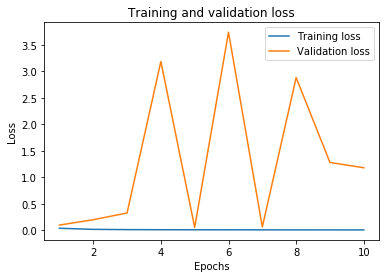

In [10]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

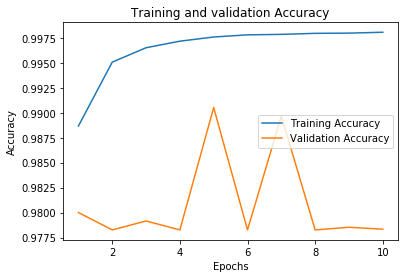

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
result =model.evaluate(x_test,Y_test)
print(result)

2246/2246 [==============================] - 1s 284us/step
[1.155681626985674, 0.9783766269683838]
